In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
vcf = open("BYxRM_segs_saccer3.bam.simplified.vcf", "r")




## Association testing with PLINK (Question 1)

In [13]:
%%bash

plink \
 --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
 --pca \
 --allow-extra-chr \
 --mind
 

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --mind
  --pca
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%

## Plotting first 2 components of PCA (Question 1)

In [27]:
eigenvec = open("plink.eigenvec", 'r')

counter = 0
cx = []
cy = []

for line in eigenvec:
    ##if counter < 10:
    linesplit = line.split(' ')
    ##counter += 1
    cx.append(float(linesplit[2]))
    cy.append(float(linesplit[3]))

    

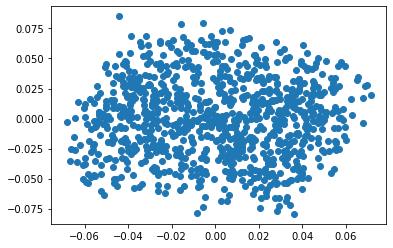

In [152]:
import matplotlib.pyplot as plt
plt.scatter(cx,cy)
plt.savefig("first_2_PCA_components_scatter.png")

In [30]:
print(linesplit)

['A11', '96', '0.00160305', '-0.0061528', '-0.0186704', '-0.030924', '-0.0101099', '-0.0225764', '0.0127377', '-0.0812833', '0.0434963', '0.0196316', '0.0529352', '-0.0107164', '0.0117967', '0.0140164', '-0.0195732', '-0.026502', '0.043823', '-0.0125507', '-0.00994205', '0.0334917\n']


## Gathering allele frequency data from vcf file (Question 2)

In [43]:
vcf = open("BYxRM_segs_saccer3.bam.simplified.vcf", "r")

AF_list = []


counter = 0

for line in vcf:
    #if counter < 100:
    if '#' not in line:
        linesplit = line.split('\t')
        for searcher in linesplit:                

            if 'AF=' in searcher:

                if ',' not in searcher:
                    AF_list.append(float(searcher[3:]))

                else:
                    searcher_split = searcher.split(',')
                    for z in searcher_split:
                        if 'AF=' in z:
                            AF_list.append(float(z[3:]))
                        else:
                            AF_list.append(float(z))
                #counter += 1


## Histogram of allele frequencies (Question 2)

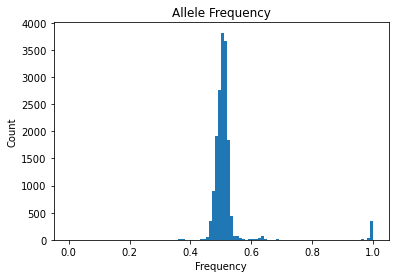

In [153]:
plt.hist(AF_list, bins = 100)
plt.title('Allele Frequency')
plt.ylabel('Count')
plt.xlabel('Frequency')
plt.savefig("Allele_frequency_histogram.png")

## Properly formatting BYxRM_PhenoData.txt for analysis (Question 3)

In [96]:
pheno = open('BYxRM_PhenoData.txt', 'r')
pheno_readable = open('BYxRM_PhenoData_fixed.txt', 'w')

counter = 0

for line in pheno:
    if "Cadmium" not in line:
    ##if counter < 10:
        line_split = line.split('\t')
        ##print(line_split)
        if '_' in line_split[0]:
            id_split = line_split[0].split('_')
        ##counter += 1

        pheno_readable.write(id_split[0]+'\t'+id_split[1]+'\t'+'\t'.join(line_split[1:]))
            


pheno_readable.close()

## Quantitative association testing for all phenotypes using the top 10 principle components (Question 3)

In [100]:
%%bash
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno BYxRM_PhenoData_fixed.txt \
  --linear \
  --all-pheno \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --allow-extra-chr


PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno BYxRM_PhenoData_fixed.txt
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
799 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%

## Testing creating Manhattan plot and QQ plot (please see next header for full loop)

In [119]:
gwas = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")

gwas['logP'] = -1 * np.log10(gwas['P'])
gwas['snp_index'] = range(len(gwas))
gwas['significant']=np.where(gwas['logP']>5,True, False)
gwas



,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,significant
0,chrI,.,1074,C,ADD,676,-0.5976,-1.62200,0.10540,0.977159,0,False
1,chrI,.,1074,C,COV1,676,10.2300,1.40100,0.16160,0.791559,1,False
2,chrI,.,1074,C,COV2,676,6.8520,0.95190,0.34150,0.466609,2,False
3,chrI,.,1074,C,COV3,676,-8.6080,-1.15900,0.24680,0.607655,3,False
4,chrI,.,1074,C,COV4,676,-9.3770,-1.26300,0.20710,0.683820,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
182859,chrXVI,.,942826,G,COV6,675,18.5200,2.49300,0.01291,1.889074,182859,False
182860,chrXVI,.,942826,G,COV7,675,-8.4760,-1.11900,0.26350,0.579219,182860,False
182861,chrXVI,.,942826,G,COV8,675,-10.7900,-1.44300,0.14960,0.825068,182861,False
182862,chrXVI,.,942826,G,COV9,675,4.7350,0.63920,0.52290,0.281581,182862,False


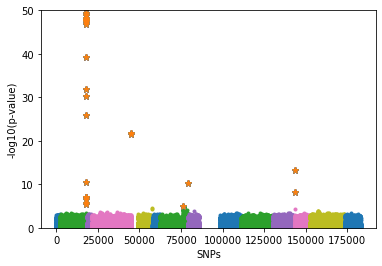

<function matplotlib.pyplot.savefig>

In [122]:
gwas['snp_index'] = range(len(gwas))
chromosomes=["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX","chrXI","chrXII","chrXIII","chrXIV","chrXV","chrXVI"]
fig, ax = plt.subplots()

for chrom in chromosomes:
    ax.scatter(gwas["snp_index"][gwas["CHR"] == chrom], gwas["logP"][gwas["CHR"] == chrom], marker = '.')
    ax.scatter(gwas["snp_index"][gwas["significant"] == True], gwas["logP"][gwas["significant"] == True], marker = '*')
plt.xlabel("SNPs")
plt.ylabel("-log10(p-value)")
ax.set_ylim(0,50)
plt.show()
plt.savefig

In [114]:
gwas_sorted = gwas.sort_values(by = "P")
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513
...,...,...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092


In [115]:
gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
gwas_sorted

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP,snp_index,uniform_points,uniform_pval,uniform_logP
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057,18447,0,0.000005,5.262128
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588,18458,1,0.000011,4.961098
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065,18469,2,0.000016,4.785007
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208,18480,3,0.000022,4.660068
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409,18513,4,0.000027,4.563158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN,NaN,182089,182859,0.999978,0.000009
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN,NaN,182090,182860,0.999984,0.000007
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN,NaN,182091,182861,0.999989,0.000005
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN,NaN,182092,182862,0.999995,0.000002


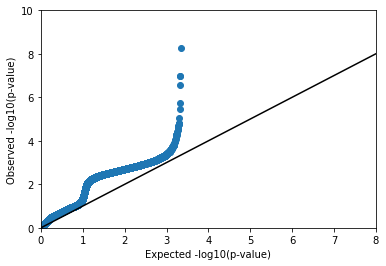

In [116]:
gwas['snp_index'] = range(len(gwas))

fig, ax = plt.subplots()

ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
ax.plot([8,0], [8, 0], color = "black")

plt.xlim([0, 8])
plt.ylim([0, 10])
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
    
plt.show()

## QQ plot and Manhattan plot generation script (Question 4)

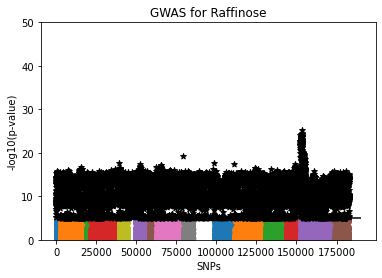

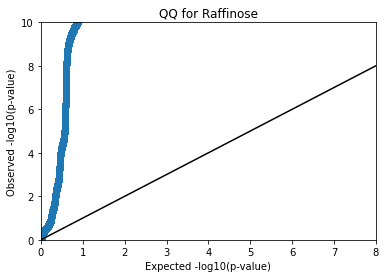

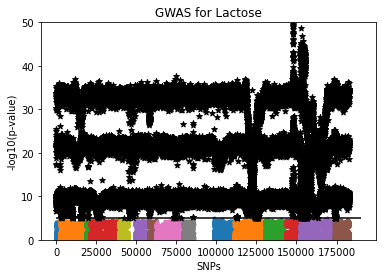

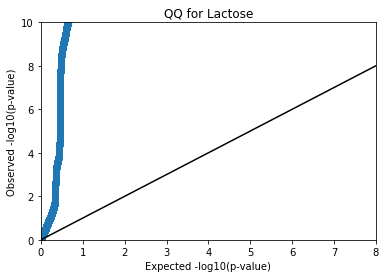

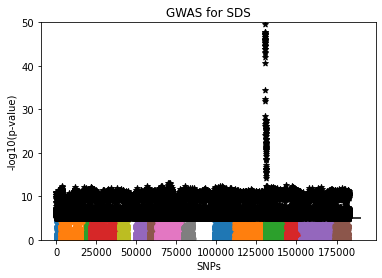

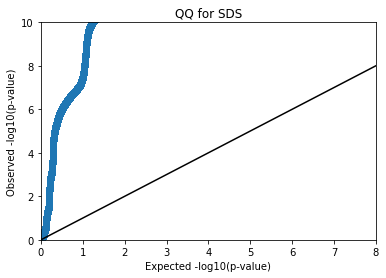

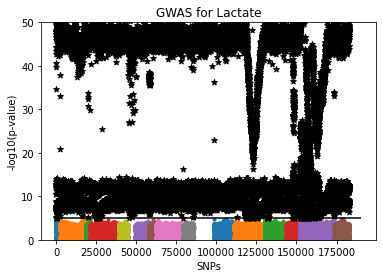

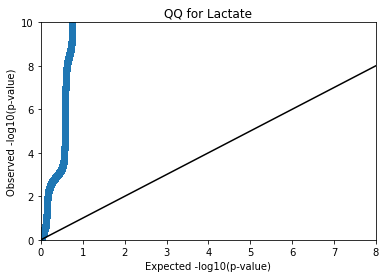

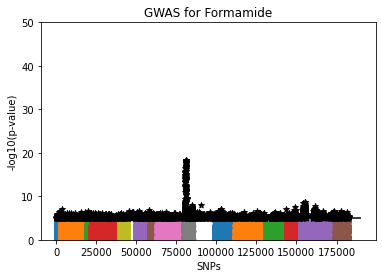

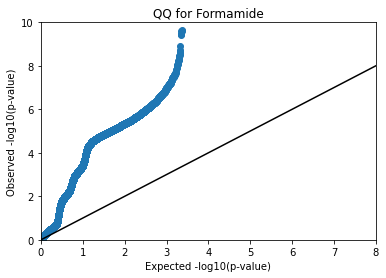

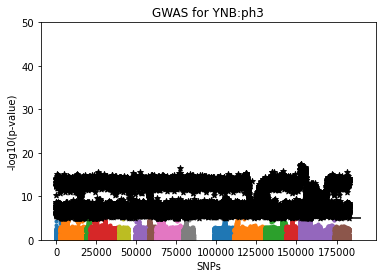

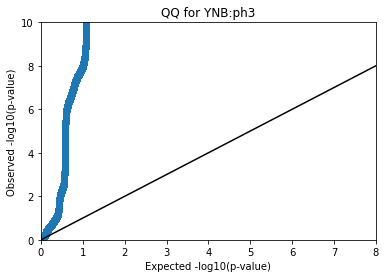

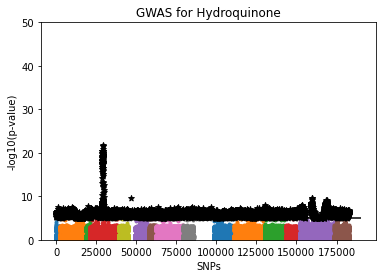

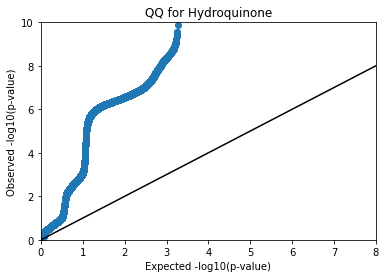

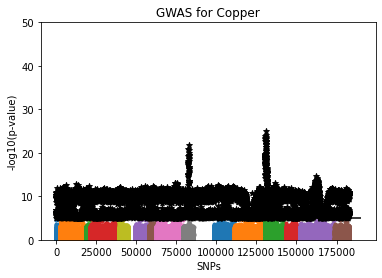

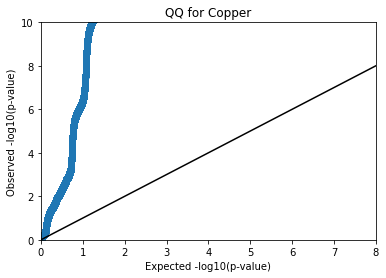

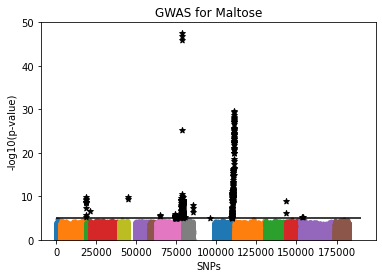

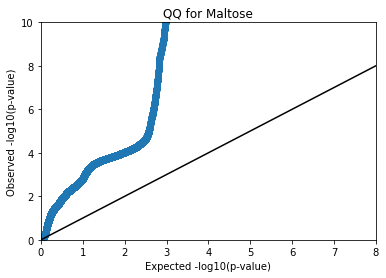

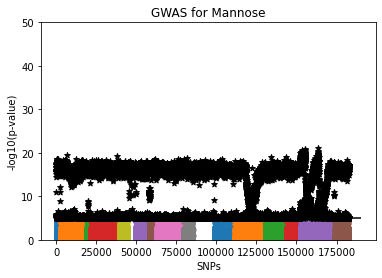

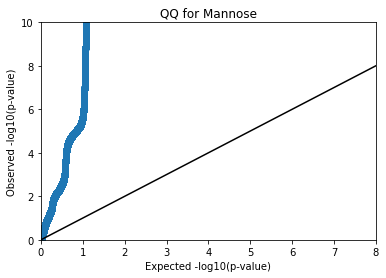

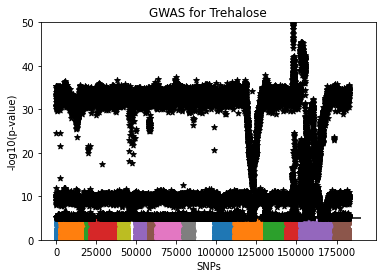

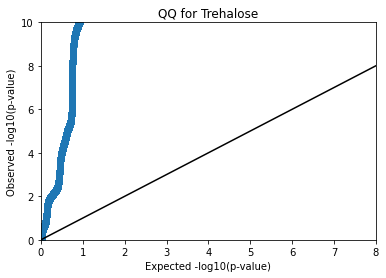

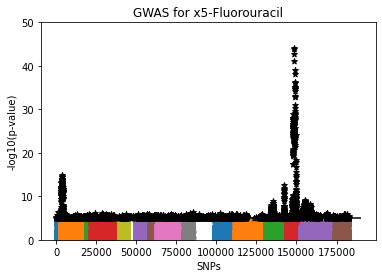

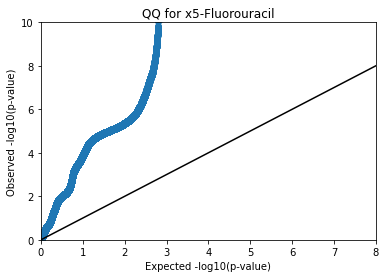

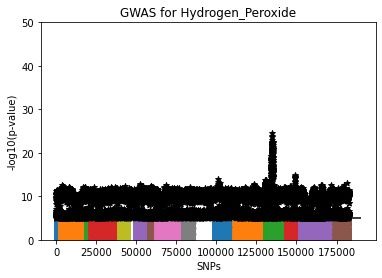

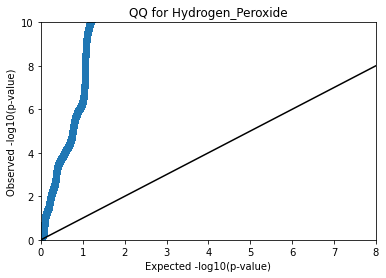

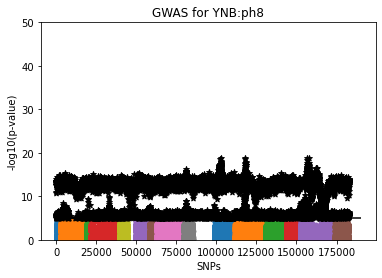

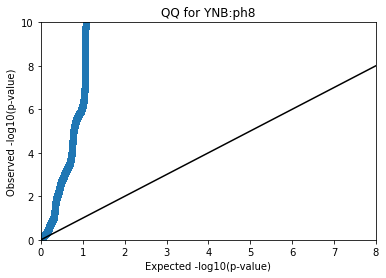

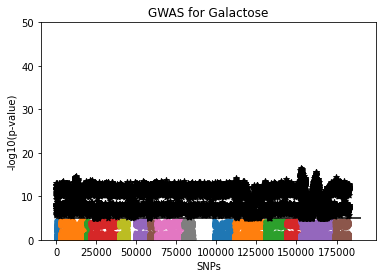

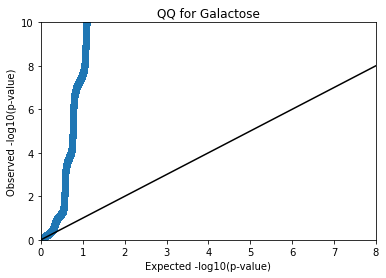

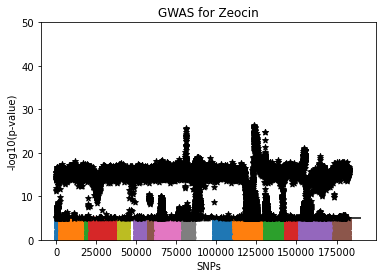

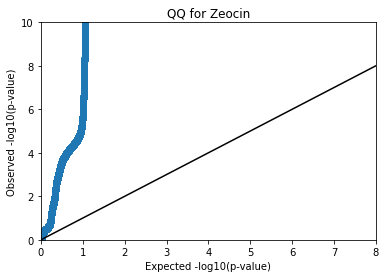

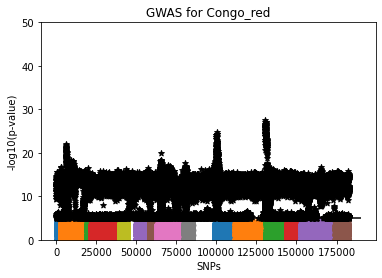

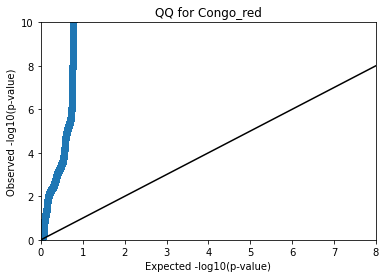

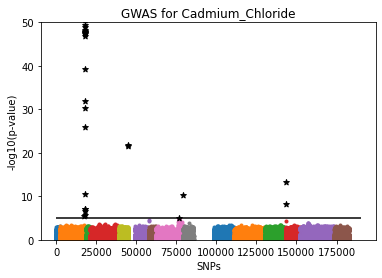

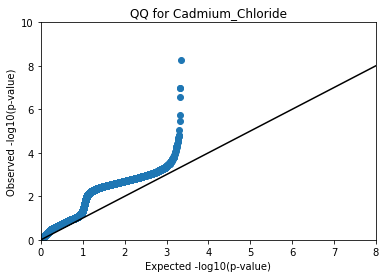

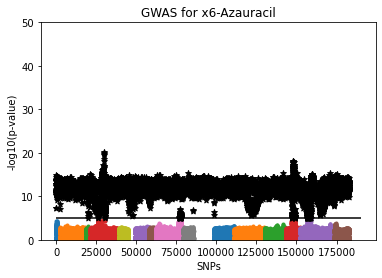

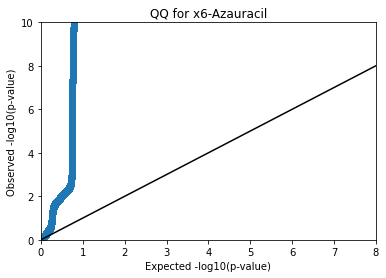

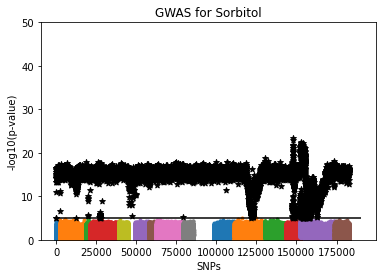

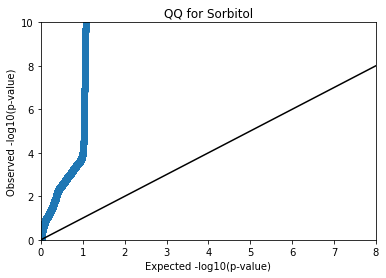

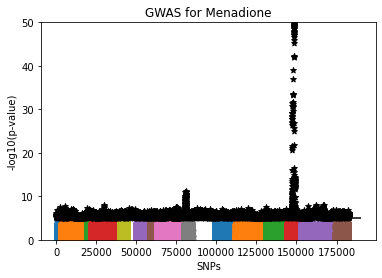

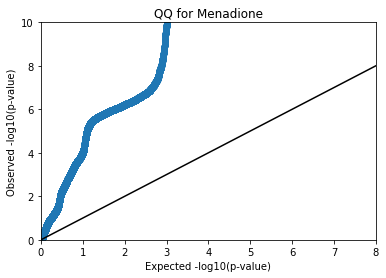

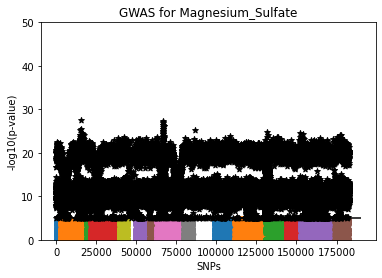

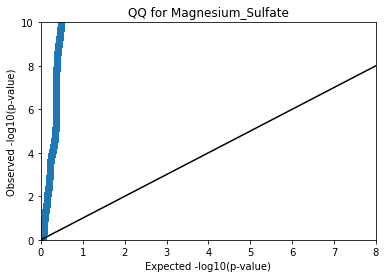

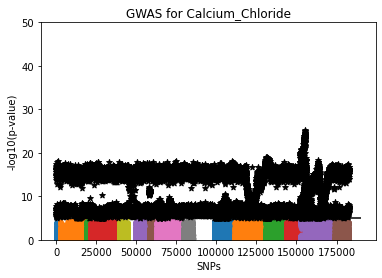

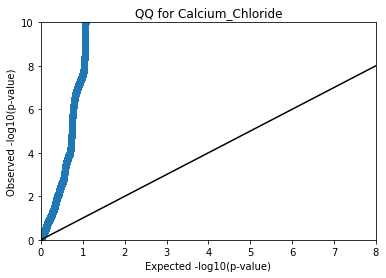

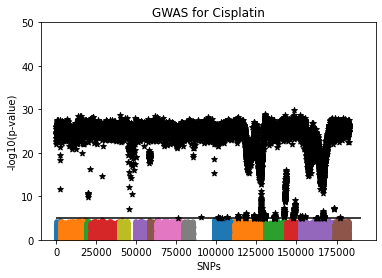

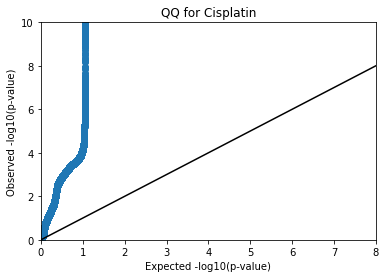

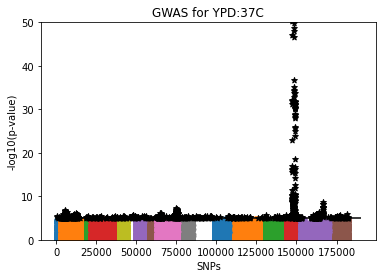

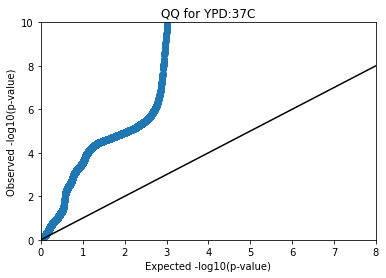

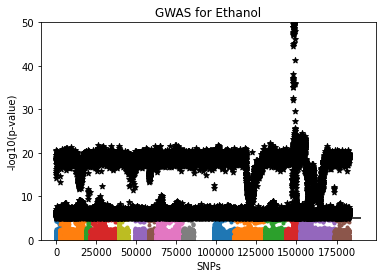

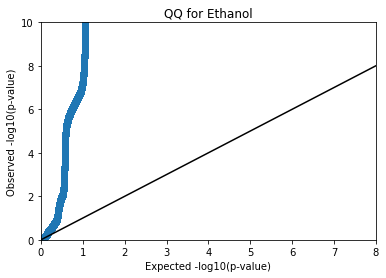

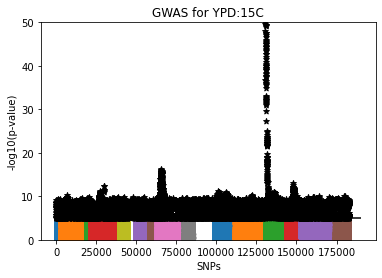

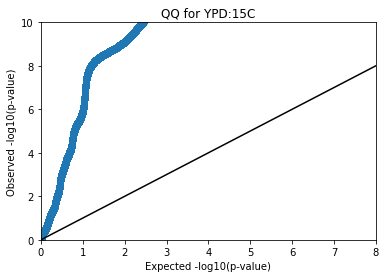

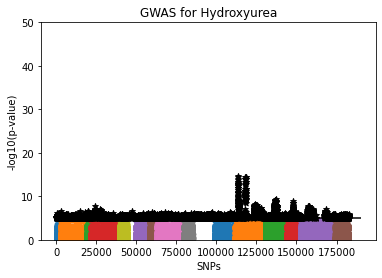

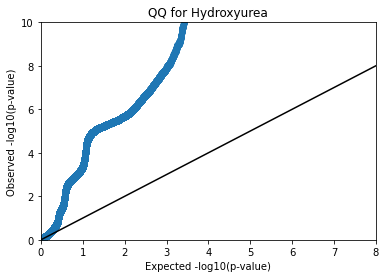

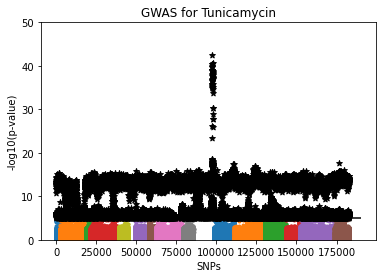

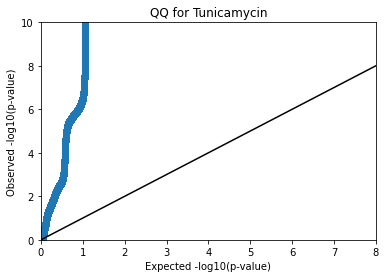

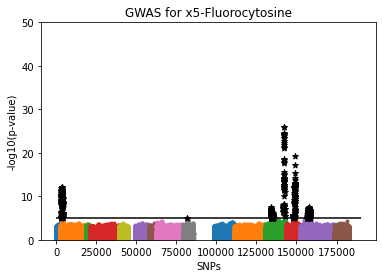

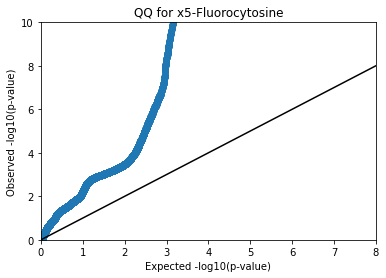

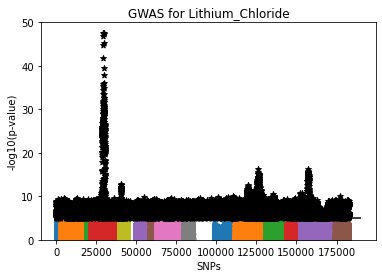

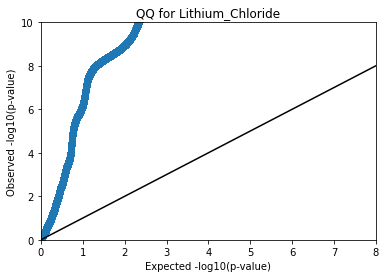

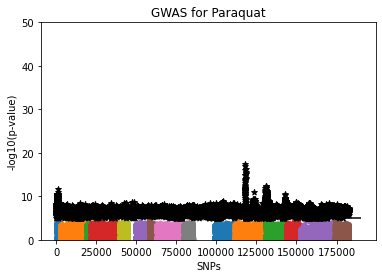

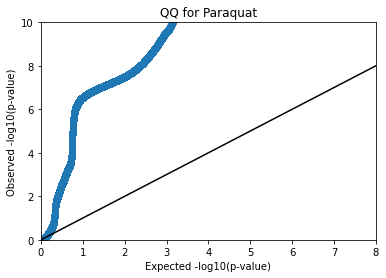

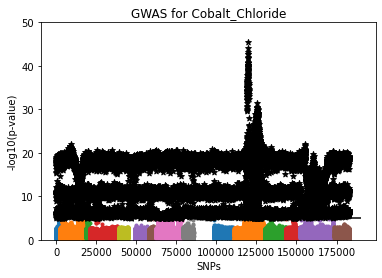

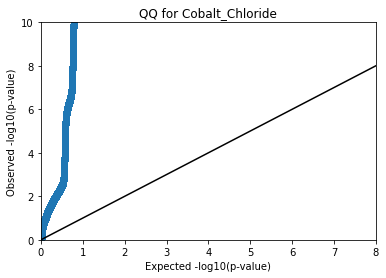

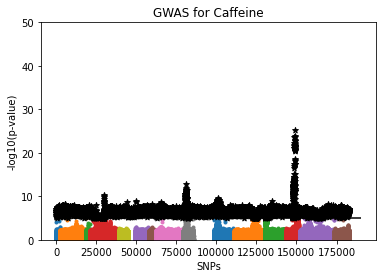

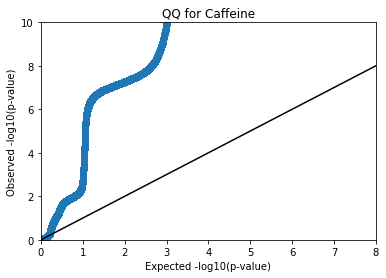

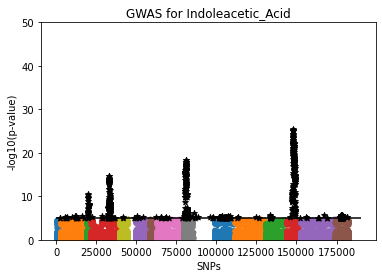

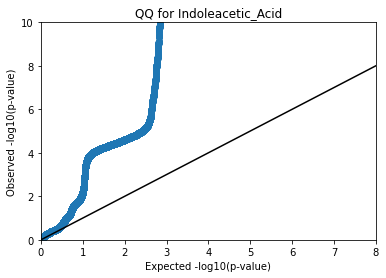

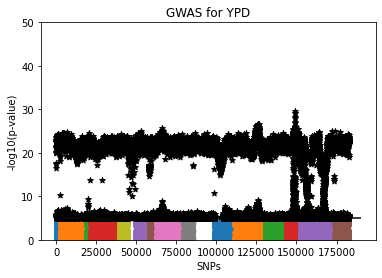

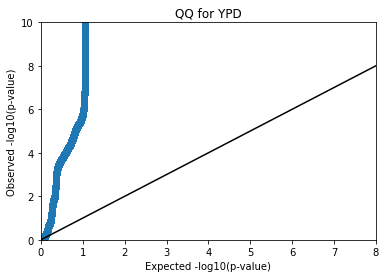

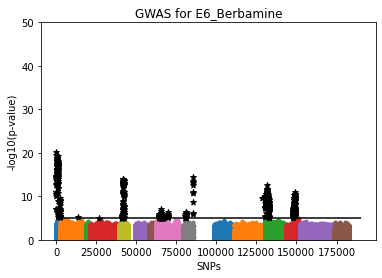

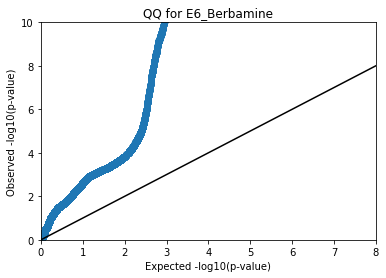

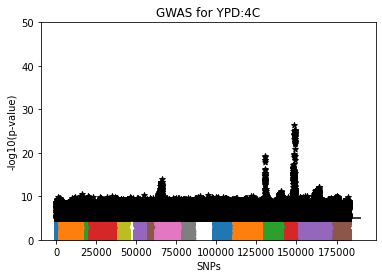

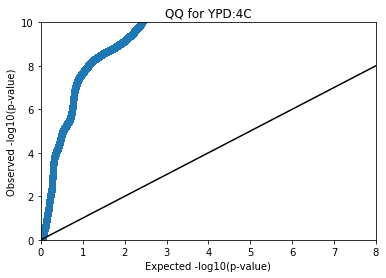

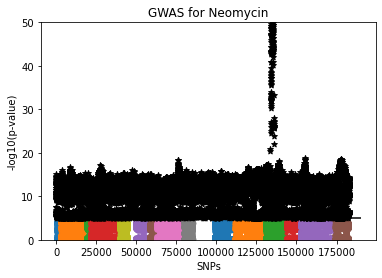

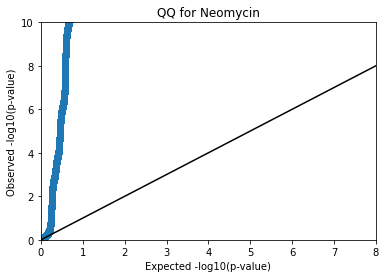

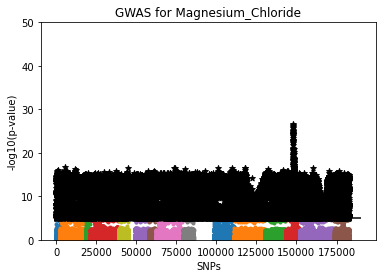

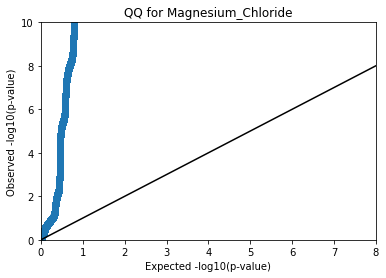

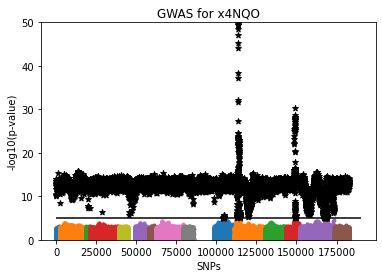

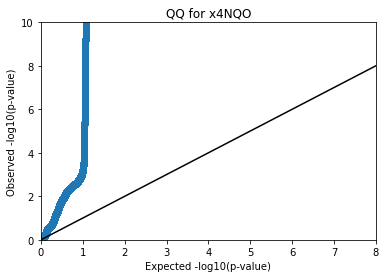

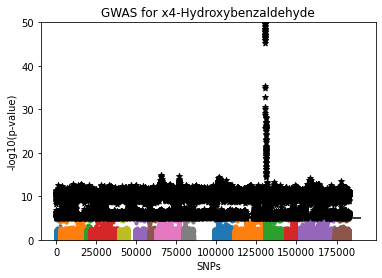

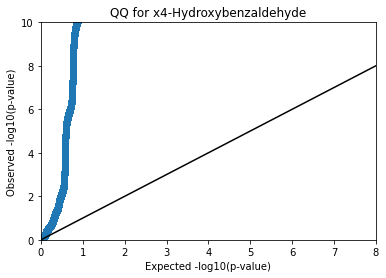

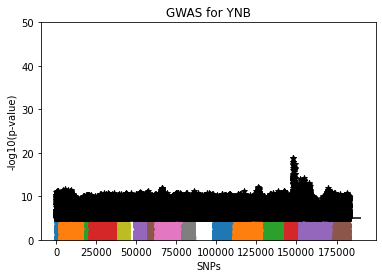

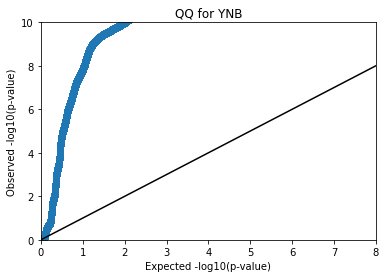

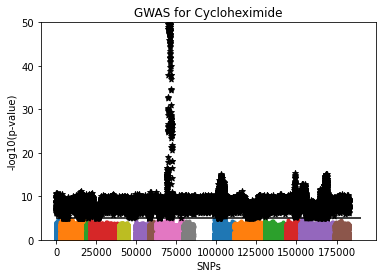

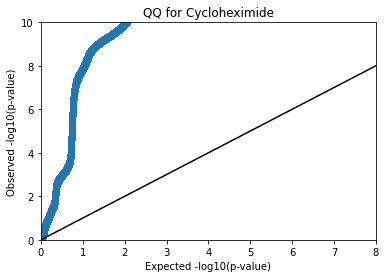

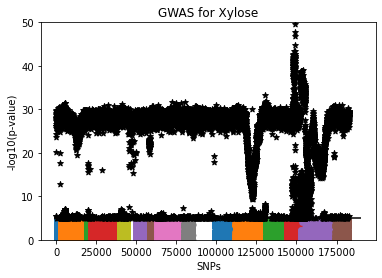

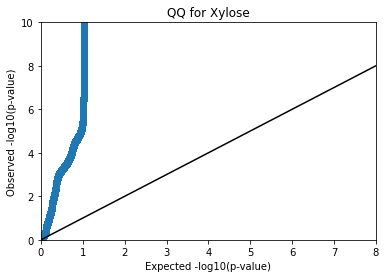

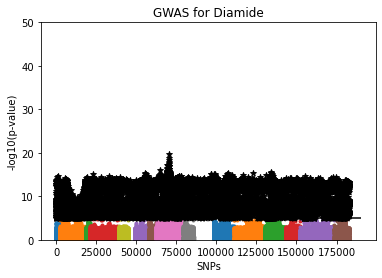

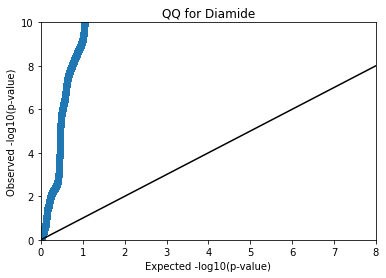

In [136]:
import glob
from glob import iglob

phenotype = open("BYxRM_PhenoData.txt",'r')
for line in phenotype:
    if "Cadmium" in line:
        phenotypes=line.split("\t")
        phenotypes = phenotypes[1:]
        phenotypes[-1]=phenotypes[-1][:-1]
    else:
        break
        
chromosomes=["chrI","chrII","chrIII","chrIV","chrV","chrVI","chrVII","chrVIII","chrIX","chrX","chrXI","chrXII","chrXIII","chrXIV","chrXV","chrXVI"]

for pathname in iglob("*.assoc.linear"):
    start = pathname.index("P")
    end = pathname.index(".assoc")
    num=pathname[start+1:end]
    pheno=phenotypes[int(num)-1]
    
    gwas = pd.read_csv(pathname, sep = "\s+")
    gwas['logP'] = -1 * np.log10(gwas['P'])
    gwas['snp_index'] = range(len(gwas))
    gwas['sig'] = np.where(gwas['logP']>5, True, False)
    
    fig, ax = plt.subplots()
    for chromosome in chromosomes:
        ax.scatter(gwas["snp_index"][(gwas["sig"]==False) & (gwas["CHR"]==chromosome)], gwas["logP"][(gwas["sig"]==False) & (gwas["CHR"]== chromosome)], marker = '.')
    ax.scatter(gwas["snp_index"][gwas["sig"]==True], gwas["logP"][gwas["sig"]==True], marker= "*", color="black")
    plt.xlabel("SNPs")
    plt.ylabel("-log10(p-value)")
    ax.set_title("GWAS for {}".format(pheno))
    ax.set_ylim(0,50)
    plt.hlines(5,0,190000, color = 'black')
    plt.savefig("GWAS {}.png".format(pheno))
    plt.show()
    
                                
    gwas_sorted = gwas.sort_values(by = "P")
    gwas_sorted['uniform_points'] = range(0, len(gwas_sorted))
    gwas_sorted['uniform_pval'] = (gwas_sorted['uniform_points'] + 1) / len(gwas_sorted)
    gwas_sorted['uniform_logP'] = -1 * np.log10(gwas_sorted['uniform_pval'])
    gwas['snp_index'] = range(len(gwas))
    fig, ax = plt.subplots()
    ax.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
    ax.plot([8,0], [8, 0], color = "black")
    plt.xlim([0, 8])
    plt.ylim([0, 10])
    plt.xlabel("Expected -log10(p-value)")
    plt.ylabel("Observed -log10(p-value)")
    ax.set_title("QQ for {}".format(pheno))
    plt.savefig("QQ {}.png".format(pheno))
    plt.show()

In [140]:
cad = pd.read_csv("plink.P1.assoc.linear", sep = "\s+")
cad['logP'] = -1 * np.log10(cad['P'])
cad.sort_values(by = 'logP', ascending = False)

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P,logP
18447,chrII,.,795756,C,ADD,706,-5.762,-58.53,1.300000e-270,269.886057
18458,chrII,.,798782,A,ADD,713,-5.621,-52.27,4.736000e-244,243.324588
18469,chrII,.,799317,A,ADD,707,-5.574,-50.16,3.872000e-233,232.412065
18480,chrII,.,799991,G,ADD,712,-5.567,-49.79,3.325000e-232,231.478208
18513,chrII,.,800746,C,ADD,720,5.521,49.16,1.957000e-230,229.708409
...,...,...,...,...,...,...,...,...,...,...
182089,chrXVI,.,890346,T,COV6,673,NaN,NaN,NaN,NaN
182090,chrXVI,.,890346,T,COV7,673,NaN,NaN,NaN,NaN
182091,chrXVI,.,890346,T,COV8,673,NaN,NaN,NaN,NaN
182092,chrXVI,.,890346,T,COV9,673,NaN,NaN,NaN,NaN


## Boxplot for effect size (Question 5)

In [147]:
genotypes_read=open("BYxRM_segs_saccer3.bam.simplified.vcf", 'r')
snp_genotypes = []
for line in genotypes_read:
    if "chrII" and "795756" in line:
        line_split = line.split("GT:DP")
        genotypes=line_split[1].split('\t')
        for genotype in genotypes[1:]:
            if '0/0' in genotype:
                snp_genotypes.append('ref_homozygous')
            elif '0/1' in genotype:
                snp_genotypes.append('heterozygous')
            elif '1/1' in genotype:
                snp_genotypes.append('alt_homozygous')
            elif './.' in genotype:
                snp_genotypes.append('skip')
                
genotypes_read.close()
pheno_dict = {}
pheno_dict['ref_homozygous'] = []
pheno_dict['heterozygous'] = []
pheno_dict['alt_homozygous'] = []
pheno_dict['skip'] =[]
phenotypes=open('ByxRM_PhenoData.txt', 'r')
count = 0
for line in phenotypes:
    if "Cadmium" in line:
        pass
    else:
        pheno_split = line.split('\t')
        category = snp_genotypes[count]
        if pheno_split[1] == 'NA':
            pass
        else:
            pheno_dict[category].append(float(pheno_split[1]))
        count+=1
phenotypes.close()
##print(pheno_dict)

{'ref_homozygous': [-7.32351970578731, -8.09823582391425, -6.1476487010431, -7.22997241979277, -7.58547633704237, -7.89098174031677, -8.1441306562098, -1.36924465920424, -6.128808382728, -5.84546012875795, -6.43593371671886, -1.74441621576143, -6.25229326692405, -6.36238023368689, -5.88859656357854, -6.29480699992117, -6.78641877360553, -6.39836128252096, -7.99635930639596, -7.06125321982111, -7.06314679239182, -8.37779742456686, -5.67423179081819, -6.23566188410748, -6.88611565269964, -6.85782128913466, -4.2682871155297, -6.20678392995085, -5.89292201873614, -6.05538986666491, -7.38996752183815, -7.26714682909263, -6.27999626729827, -6.25711546051994, -6.62489996909742, -4.24207145430539, -8.87521903550105, -6.4361631134774, 11.6216820598333, -7.19366598672982, -6.58755086498097, -6.61148097919508, 9.67063748260995, -5.92095360250103, -7.27300457339194, -5.60675805824291, -3.01092333000737, 7.52126780684096, -3.4518876270865, 7.13839644253372, 4.10320093538712, 6.3526232359389, -8.222

## Generating the box plot (Question 5)

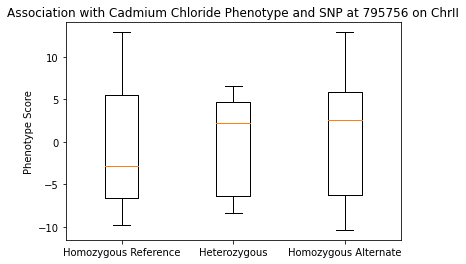

In [149]:
data = list(pheno_dict.values())
fig, ax=plt.subplots()
plt.boxplot(data[:3])
ax.set_title("Association with Cadmium Chloride Phenotype and SNP at 795756 on ChrII")
ax.set_xticklabels(["Homozygous Reference", "Heterozygous", "Homozygous Alternate"])
plt.ylabel("Phenotype Score")
plt.savefig("Boxplot795756_ChrII.png")